In [2]:
import pandas as pd
import datetime
import numpy as np
from vega_datasets import data

import seaborn as sns
import matplotlib as plt

In [3]:
# Brining in the data and checking the top 5 and shape
df = data.sf_temps()
#making it a data frame since first time I brought it in and set index it did not work
df = pd.DataFrame(df)

df.shape
df.head()


,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [4]:
df.dtypes
# already in datetime format

temp           float64
date    datetime64[ns]
dtype: object

In [5]:
df = df.set_index('date').sort_index()

df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [7]:
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [8]:
df['month'] = df.date.dt.month()
df['day'] = df.date.dt.day()
df['weekday'] = df.date.dt.day_name()
df.head()

AttributeError: 'DataFrame' object has no attribute 'date'

<AxesSubplot:xlabel='date'>

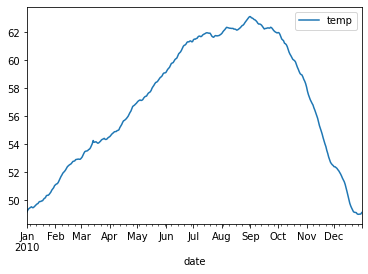

In [9]:
day_resample = df.resample('D').mean()
day_resample.plot()

<AxesSubplot:xlabel='date'>

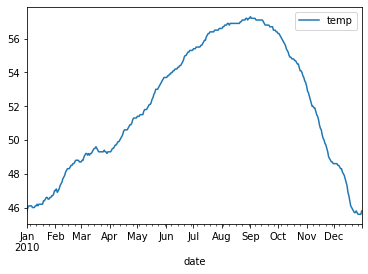

In [10]:
day_min = df.resample('D').min()
day_min.plot()

<AxesSubplot:xlabel='date'>

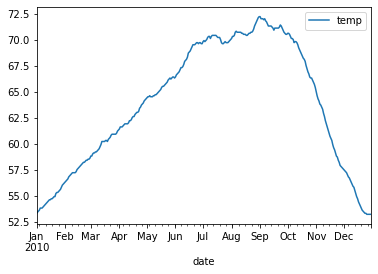

In [12]:
day_max = df.resample('D').max()
day_max.plot()

In [19]:
month_avg_mean = df.resample('M').mean()
month_avg_mean.min()

temp    49.98414
dtype: float64

In [18]:
month_avg_mean.max()

temp    62.487083
dtype: float64

In [20]:
# This is not correct as it is a max no highest mean
month_avg_max = df.resample('M').max()
month_avg_max.max()

temp    72.2
dtype: float64

In [27]:
df.columns


Index(['temp'], dtype='object')

In [29]:
# Just trying to make new day
df['day'] = df.index.day

In [31]:
# Checking to see if it 
df.day.value_counts()

1     288
2     288
28    288
27    288
26    288
25    288
24    288
23    288
22    288
21    288
20    288
19    288
18    288
17    288
16    288
15    288
13    288
12    288
11    288
10    288
9     288
8     288
7     288
6     288
5     288
4     288
3     288
14    287
29    264
30    264
31    168
Name: day, dtype: int64

In [32]:
# having a min max 
day_min_max = df.resample('D').temp.agg(['min','max'])
day_min_max.head()

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8


#
---
# second part for seattle

In [33]:
seattle = data.seattle_weather()

seattle.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [38]:
seattle.columns

Index(['precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [42]:
seattle.resample('M').precipitation.sum().max()

seattle.resample('M').precipitation.sum().sort_values(ascending=False).head(1)



date
2015-12-31    284.5
Name: precipitation, dtype: float64

Visualize the amount of monthly precipitation over time.

<AxesSubplot:xlabel='date'>

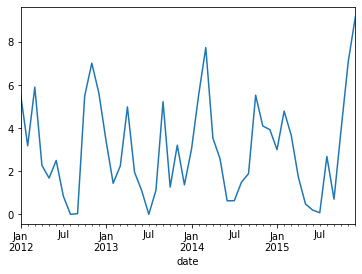

In [45]:
rain_totals = seattle.resample('M').precipitation.mean()
rain_totals.plot()

Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<AxesSubplot:xlabel='date'>

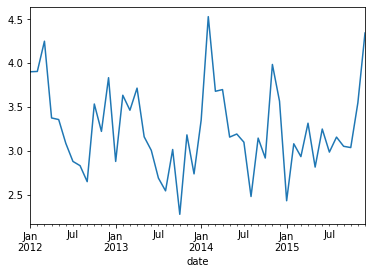

In [46]:
wind_time = seattle.resample('M').wind.mean()
wind_time.plot()

Which year-month combination is the windiest?

In [48]:
wind_mean = seattle.resample('M').wind.sum().sort_values(ascending=False)
wind_mean.head(1)

date
2015-12-31    134.6
Name: wind, dtype: float64

What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [56]:
(seattle.weather=='sun').resample('Y').sum().idxmax().year

2014

In which month does it rain the most?

In [63]:
seattle.resample('M').precipitation.sum().idxmax().month

12

In [61]:
#The most rainy days does not equal the most precipitation
(seattle.weather =='rain').resample("M").sum().idxmax().month

11

Which month has the most number of days with a non-zero amount of precipitation?


In [66]:
(seattle.precipitation > 0).resample('M').sum().idxmax().month

12

#
---
Flight data 

In [69]:
flights = data.flights_20k()

In [70]:
flights.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [72]:
flights.dtypes

date           datetime64[ns]
delay                   int64
distance                int64
origin                 object
destination            object
dtype: object

In [76]:
flights['delay'] = flights.delay.apply(lambda x: 0 if x <0 else x)

In [77]:
flights.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,0,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,0,550,MSY,MCO
4,2001-03-30 21:45:00,0,229,STL,IND


Which hour of the day has the highest average delay?

In [87]:
flight.columns

Index(['date', 'delay', 'distance', 'origin', 'destination'], dtype='object')

In [ ]:
# ([flights.index.hour]).delay.mean().idxmax()

In [84]:
# had to do this becuase the regular i used above did not work
flights['hour'] = flights.index.hour

In [90]:
flights.groupby('hour').delay.mean().idxmax()

3

Does the day of the week make a difference in the delay amount?

In [97]:
flights['day'] = flights.index.day_name()

In [100]:
flights.groupby('day').delay.mean().sort_values(ascending=False)

day
Friday       17.757596
Thursday     12.821322
Wednesday    11.032478
Sunday       10.413542
Tuesday       9.410866
Saturday      8.431498
Monday        7.165772
Name: delay, dtype: float64

In [101]:
flights['month'] = flights.index.month_name()

In [102]:
flights.groupby('month').delay.mean().sort_values()

month
March        9.875287
January     11.301592
February    12.306106
Name: delay, dtype: float64